In [ ]:
# Handling, processing and visualization of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Handling and processing of georreferenced data
import geopandas as gpd

# Other libraries
from google.colab import files
import matplotlib.lines as mlines
import requests
import zipfile
import io

In [ ]:
# Libraries for files loading

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def FileDataDf(dictFiles, i, source):
  ''' This function allows to open csv files stored either in Google Drive or
  from a device. It takes as input a dictionary containing files link or path
  and the index of the element in the dictionary. It also takes a third
  parameter (source) wich specifies the source of the files'''

  if source == 'gdrive': # Files hosted in Google Drive.
    FilesPath = list(dictFiles.values())[i]
    idPath = FilesPath.split('/', 6)
    downloadedFiles = drive.CreateFile({'id':idPath[5]})
    downloadedFiles.GetContentFile(list(dictFiles.keys())[i])
    dfData = pd.read_csv(list(dictFiles.keys())[i])#, encoding='unicode_escape')

  elif source == 'other': # Files imported from device or Colab files
    dfData = pd.read_csv(list(dictFiles.values())[i], encoding='unicode_escape')

  return dfData

In [ ]:
# https://drive.google.com/file/d/1Rl3vW2NIXCduUP_j7yqzQspa-TkVIvYm/view?usp=sharing

dictFilesPath ={
    "1.csv" : "https://drive.google.com/file/d/1Rl3vW2NIXCduUP_j7yqzQspa-TkVIvYm/view?usp=sharing",
    }

In [ ]:
#listColumns = ['latitude', 'longitude', 'acq_date', 'type']
dfLoaded = FileDataDf(dictFilesPath, 0, source = 'gdrive')#[listColumns] # Select the correct source

<ipython-input-5-5faafb0f0655>:12: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,26

In [ ]:
dfLoaded

,cluster,longitude,latitude,NDVI1,NDVI1.1,NDVI1.2,NDVI1.3,NDVI1.4,NDVI1.5,NDVI1.6,...,NDVI1.516,NDVI1.517,NDVI1.518,NDVI1.519,NDVI1.520,NDVI1.521,NDVI1.522,NDVI1.523,NDVI1.524,NDVI1.525
0,NaN,NaN,NaN,2000-02-18,2000-03-05,2000-03-21,2000-04-06,2000-04-22,2000-05-08,2000-05-24,...,2022-07-28,2022-08-13,2022-08-29,2022-09-14,2022-09-30,2022-10-16,2022-11-01,2022-11-17,2022-12-03,2022-12-19
1,1.0,-60.181510,-30.712277,7432.0,7817.0,4754.0,7966.0,8044.0,8186.0,7961.0,...,3173.0,3921.0,3976.0,4675.0,3568.0,4080.0,3551.0,4582.0,7065.0,6681.0
2,1.0,-60.181510,-30.707785,7331.0,7474.0,5191.0,7900.0,7930.0,8166.0,7916.0,...,3025.0,2735.0,3197.0,3024.0,2876.0,2874.0,2945.0,3700.0,8191.0,7955.0
3,1.0,-60.179264,-30.712277,7219.0,7756.0,4954.0,7966.0,8115.0,8264.0,7880.0,...,4112.0,3921.0,3672.0,4385.0,4202.0,3670.0,4277.0,4507.0,5814.0,6880.0
4,1.0,-60.179264,-30.710031,6809.0,7420.0,2575.0,8107.0,8158.0,8166.0,8415.0,...,3595.0,3264.0,3370.0,3883.0,2833.0,3670.0,3364.0,5612.0,8077.0,6880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,40.0,-60.057991,-30.721260,6821.0,6019.0,5305.0,5940.0,5548.0,5900.0,6182.0,...,2688.0,2563.0,2773.0,2435.0,2530.0,2608.0,2602.0,3101.0,6760.0,8152.0
3574,40.0,-60.049008,-30.712277,6921.0,7161.0,6826.0,6960.0,7019.0,6806.0,6119.0,...,2761.0,2573.0,3024.0,3472.0,3561.0,3045.0,2719.0,4504.0,6815.0,7656.0
3575,40.0,-60.042271,-30.723506,6717.0,7116.0,7095.0,6968.0,6872.0,6720.0,6150.0,...,2825.0,2400.0,2858.0,2449.0,2947.0,2596.0,3360.0,5153.0,6958.0,7627.0
3576,40.0,-60.042271,-30.721260,6560.0,7116.0,5395.0,5869.0,6547.0,6352.0,5526.0,...,3019.0,2538.0,2974.0,2778.0,2947.0,2646.0,3386.0,4078.0,6851.0,7357.0


In [ ]:
#dfLoaded[dfLoaded['cluster']==1]

In [ ]:
dfNDVIsamples = dfLoaded.copy()

pdsFechas = dfNDVIsamples.iloc[0, 3:]

In [ ]:
# @title Funciones gráficos

def tsNDVI(matrixClusterNDVI, pos):
  sns.set()
  mean_1 = np.mean(matrixClusterNDVI, axis=0)
  std_1 = np.std(matrixClusterNDVI, axis=0)

  '''ymax = 7300
  ymaxstd = 1200
  axs[pos].plot(pdsFechas, np.full(len(pdsFechas), ymax), '--', color='black', label=f'NDVI max')
  axs[pos].fill_between(pdsFechas, ymax - ymaxstd, ymax + ymaxstd, color='black', alpha=0.2)

  ymin = 3170
  yminstd = 640
  axs[pos].plot(pdsFechas, np.full(len(pdsFechas), ymin), '--', color='black', label=f'NDVI max')
  axs[pos].fill_between(pdsFechas, ymin - yminstd, ymin + yminstd, color='black', alpha=0.2)'''

  axs[pos].plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='#14870c')
  axs[pos].fill_between(pdsFechas, mean_1 - std_1, mean_1 + std_1, color='#14870c', alpha=0.2)

  axs[pos].xaxis.set_major_locator(plt.MultipleLocator(base=12*2))  # Adjust to desired frequency
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
  axs[pos].tick_params(axis='both', labelsize=11)

  axs[pos].set_ylabel('NDVI MODIS TS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
  axs[pos].set_xlabel('Fecha', fontsize=13)
  axs[pos].set_ylim(0,1) # CAMBIE 10000 X 1 PARA NORMALIZAR
  axs[pos].legend(loc='upper left') #best

def hbarNDVI(matrixClusterNDVI, startYear, endYear, pos):

  #matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()
  meanNDVIxClust = np.mean(matrixClusterNDVI, axis=0)

  dfNDVImxFech = pd.DataFrame()
  dfNDVImxFech['Fecha'] = pdsFechas
  dfNDVImxFech['MeanNDVI'] = meanNDVIxClust

  dfNDVImxFech['Fecha'] = pd.to_datetime(dfNDVImxFech['Fecha'], format='%Y-%m-%d')
  dfNDVImxFechFilt = dfNDVImxFech[(dfNDVImxFech['Fecha'] >= f'{startYear}-01-01') & (dfNDVImxFech['Fecha'] <= f'{endYear}-01-01')]

  listFechas = dfNDVImxFechFilt['Fecha'].astype('str')
  dfNDVImxFechFilt['Mes'] = [int(f[5:7]) for f in listFechas]
  listMeanNDVIVal = []
  for m in range(1, 13):
    listMeanNDVIVal.append(int(dfNDVImxFechFilt[dfNDVImxFechFilt['Mes']==m]['MeanNDVI'].mean()))

  # Plot
  axs[pos].barh([m for m in range(1, 13)],
          np.array(listMeanNDVIVal),
          color='limegreen')#,
          #width =0.8,
          #label='NDVI MODIS-Arroceras')

  axs[pos].set_ylabel('MM', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
  axs[pos].set_xlabel('NDVI MODIS', fontsize=13)
  axs[pos].legend(loc='best', fontsize=12)
  axs[pos].set_title(f'Años:{startYear}-{endYear}/Max:{np.array(listMeanNDVIVal).max()}/Min:{np.array(listMeanNDVIVal).min()}/deltaNDVI:{np.array(listMeanNDVIVal).max()-np.array(listMeanNDVIVal).min()}')

  # Adjust the frequency of x-axis ticks
  #axs.xaxis.set_major_locator(plt.MultipleLocator(base=1))  # Adjust to desired frequency,
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=0, ha='right', fontsize=11)
  axs[pos].tick_params(axis='both', labelsize=13)

<ipython-input-27-9fba088bd3e9>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[pos].plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='#14870c')
<ipython-input-27-9fba088bd3e9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-27-9fba088bd3e9>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNDVImxFechFilt['Mes'] = [int(f[5:7]) for f in listFechas]
<ipython-input-27-9fba088bd3e9>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[pos].set_xti

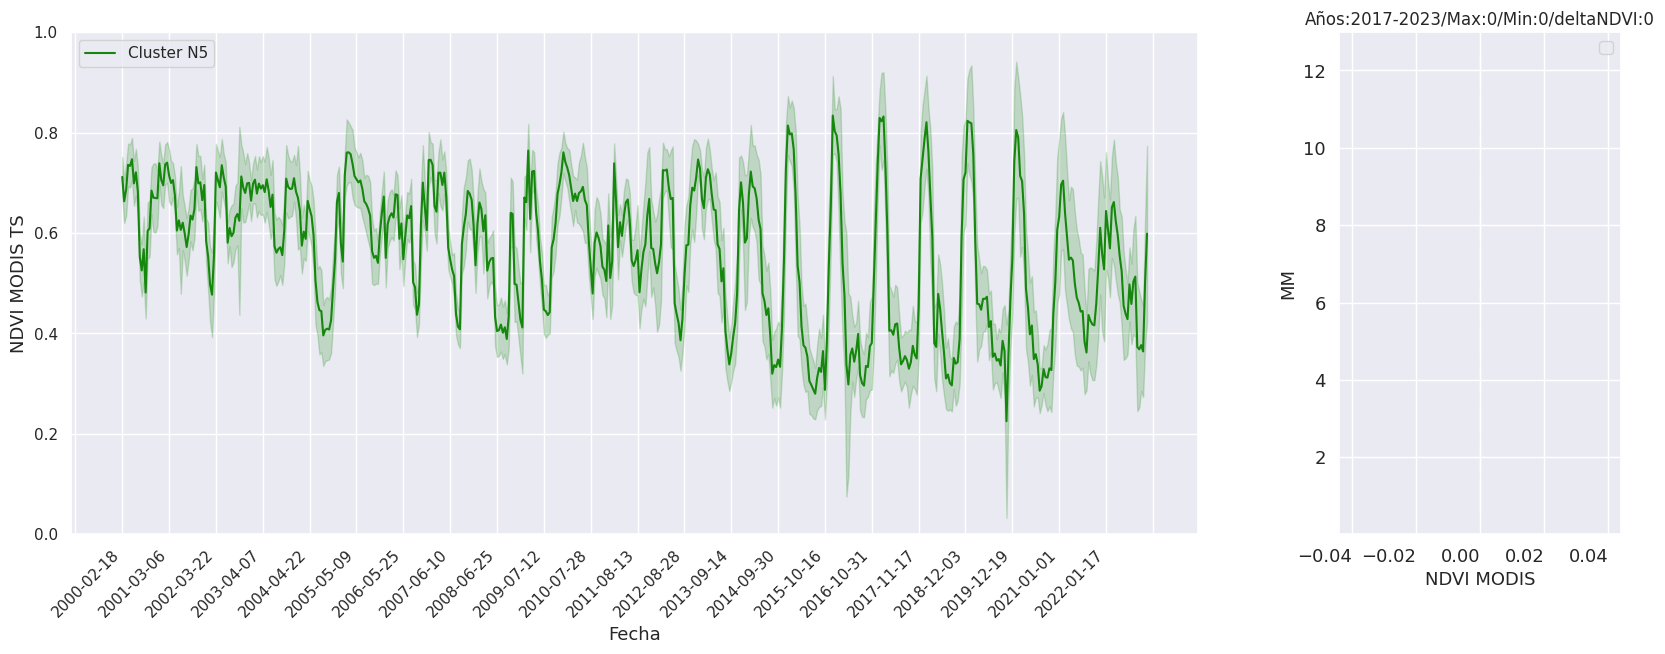

In [ ]:
Ncluster = 5

startYear = 2017
endYear = 2023

matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()/10000

fig, axs = plt.subplots(1, 2, figsize=(20, 6.52), gridspec_kw={'width_ratios': [4, 1]})#, sharex=True)

tsNDVI(matrixClusterNDVI, 0)
hbarNDVI(matrixClusterNDVI, str(startYear), str(endYear), 1)

# Tabla NDVI

In [ ]:
#listClustSelecc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 39, 40]
listClustSelecc = [12, 13]

In [ ]:
def meanValMonth(pdsFechas, meanNDVIxClust, YY, MM):
  dfFechasS_Filt = pd.DataFrame()
  dfFechasS_Filt['Fecha'] = pdsFechas
  dfFechasS_Filt['Fecha'] = pd.to_datetime(dfFechasS_Filt['Fecha'], format='%Y-%m-%d')
  dfFechasS_Filt = dfFechasS_Filt.reset_index()
  dfFechasFilt = dfFechasS_Filt[(dfFechasS_Filt['Fecha'] >= f'{YY}-{MM}-01') & (dfFechasS_Filt['Fecha'] <= f'{YY}-{MM}-31')]
  return (meanNDVIxClust[list(dfFechasFilt.index)]).mean()

dfdeltaNDVIxClus = pd.DataFrame()
dfdeltaNDVIxClus['Año'] = list(range(2000, 2023))

for Ncluster in listClustSelecc:

  print(Ncluster)
  matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()
  meanNDVIxClust = np.mean(matrixClusterNDVI, axis=0)

  dfdeltaNDVIxClus[f'Cluster N{Ncluster}'] = [ (meanValMonth(pdsFechas, meanNDVIxClust, y,1)-meanValMonth(pdsFechas, meanNDVIxClust, y,8)) for y in range(2000, 2023)]

12


<ipython-input-14-f8a2db30cea6>:7: RuntimeWarning: Mean of empty slice.
  return (meanNDVIxClust[list(dfFechasFilt.index)]).mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


13


<ipython-input-14-f8a2db30cea6>:7: RuntimeWarning: Mean of empty slice.
  return (meanNDVIxClust[list(dfFechasFilt.index)]).mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# determining the name of the file
file_name = 'DeltaNDVIxAnio.xlsx'

# saving the excel
dfdeltaNDVIxClus.to_excel(file_name)

### Gráficos analisis para definicion de min, mean y max para arroceras

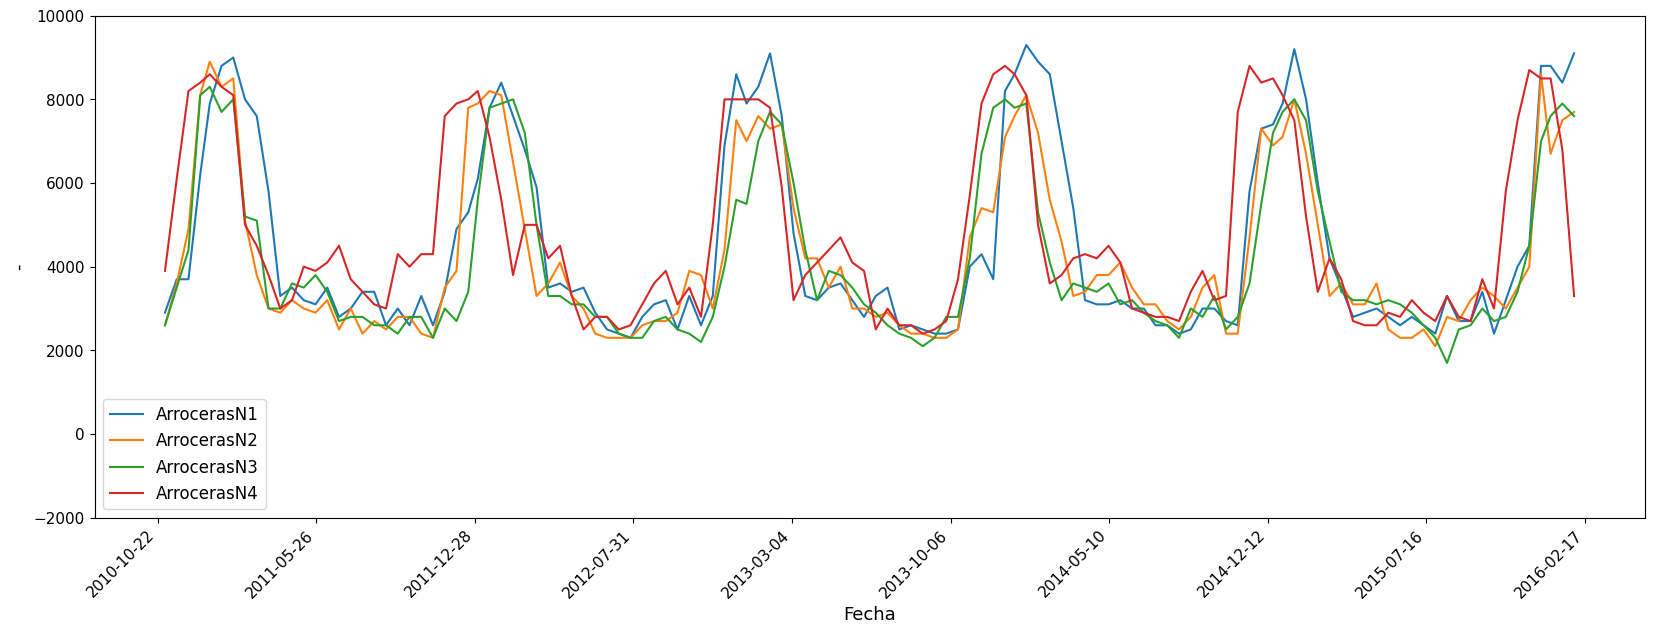

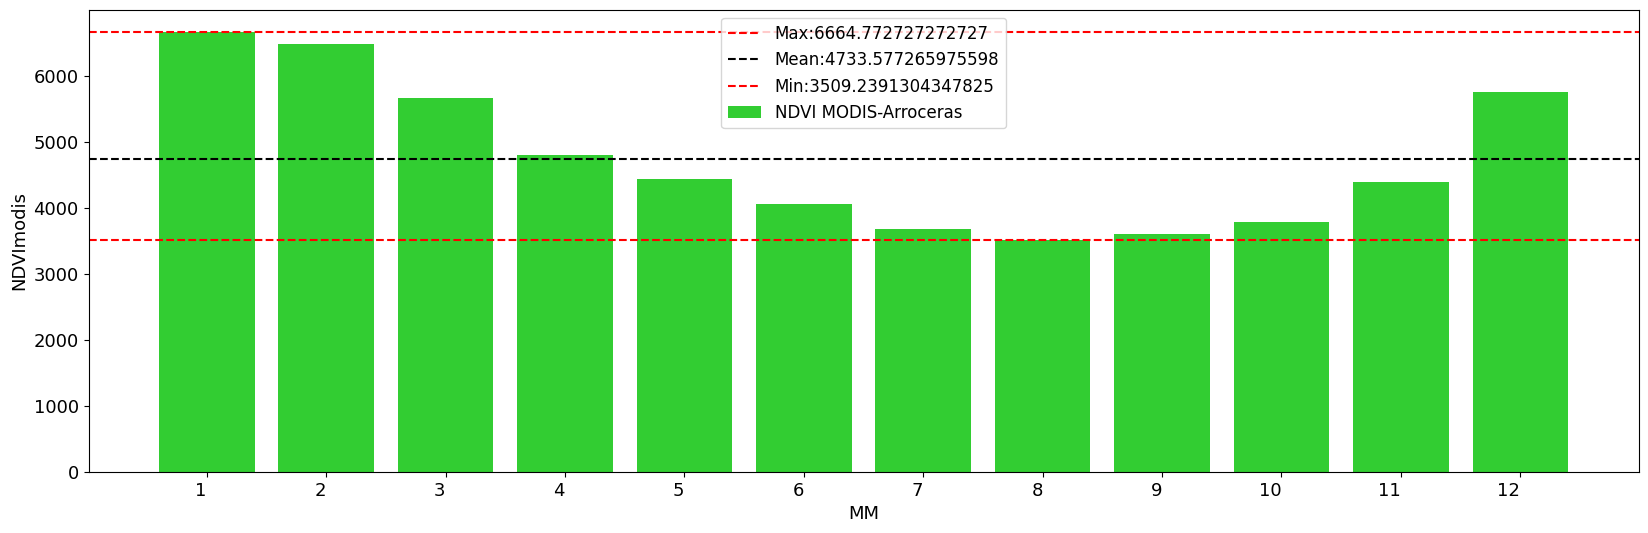